# Week 8 Exploratory Data Project
November 10, 2021 - Angela Spencer and Clarine Esperance

Executive Summary
For this project we used data from the http://audiodb.com which uses a JSON API and contains information on over 53,000 artists. In order to pull a managable amount of data, we created a list of randomly generated numbers within the range of available artist IDs. This list was used to loop through the database URLs and pull information on all available artist IDs in the list. From this information we created a new list with artist names corresponding to the aritst IDs. With the new list of artist IDs we were able to loop through database URLs to populate a dictionary with data, including: artist_id, artist_name, gender, members, style, genre, year_formed, year_disbanded, location.

(Angela is still working here)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json

In [2]:
#modules for statistics
import math
import statistics
from scipy import stats

# Generate Artists List

In [3]:
# Find a code to get all the artists from this api
#https://www.theaudiodb.com/api_guide.php
# theaudiodb.com/api/v1/json/1/search.php?s=coldplay
artist_names = []

In [4]:
#generate random numbers in the range of available artist IDs
#used to populate artist_names list
random_nums = np.random.randint(low=100000, high=170000, size=800)
#print(ran_ids)

#test with known IDs and intentional erroes
#random_nums = [112024, 0, 100000, 114364]

In [5]:
#create a base url
#example: https://theaudiodb.com/api/v1/json/1/artist.php?i=112024
id_url = "https://theaudiodb.com/api/v1/json/1/artist.php?i="

#create a loop that uses random number
for num in random_nums:
    unique_url = id_url + f'{num}'
    
    #call api url
    request = requests.get(unique_url)
    
    #for each attempt try to convert information to json
    try:
        #convert to json
        info = request.json()
    
    #exception json decode error
    #https://docs.python.org/3/tutorial/controlflow.html
    except json.JSONDecodeError:
        #end this iteration and continue new iteration of for loop
        continue
    
    #if json conversion successful then
    #try to create a variable for single artist to reference later
    try:
        artist = info['artists'][0]['strArtist']
        
    #TypeError exception if url responds with {'artists': None}
    except (TypeError):
        continue
        
    #if the artist is not already in the list then 
    if artist not in artist_names:
        
        #populate artist_names list using info(json)
        #response-> {'artists': [{'idArtist': '114364', 'strArtist': 'Beyoncé', ...
        #dictionary{'artists':['{dictionary}']}
        artist_names.append(info['artists'][0]['strArtist'])
    
    #print(artist_names)

In [6]:
len(artist_names)

602

In [7]:
#print(artist_names)

# Generate Dictionary of Artist Data

In [8]:
#alternative to "if not in list then .append"
#convert list to set to remove redundant artists

#unique_artist_ids = set(artist_ids)
#print(unique_artist_ids)

In [9]:
#create loop to pull artist information from the database
#using populated artist_names list
#example url: http://theaudiodb.com/api/v1/json/1/search.php?s=coldplay
#tutorial: https://www.youtube.com/watch?v=pxofwuWTs7c

#create empty dictionary to fill with values
audio_data = {'artist_id':[],
              'artist_name':[],
              'gender':[],
              'members':[],
              'style':[], 
              'genre':[],
             'year_formed':[],
             'year_disbanded':[],
             'location':[]}

#for each artist in the artist list, 
for name in artist_names:
    
    #add the artist name to the base url
    base_url = "http://theaudiodb.com/api/v1/json/1/search.php?s="
    req = requests.get(base_url + f'{name}')
    
    #convert request information into json as a variable
    data = req.json()
    
    #add json values to dictionary
    try:
        audio_data['artist_id'].append(data['artists'][0]['idArtist'])
        audio_data['artist_name'].append(data['artists'][0]['strArtist'])
        audio_data['gender'].append(data['artists'][0]["strGender"])
        audio_data['members'].append(data['artists'][0]["intMembers"])
        audio_data['style'].append(data['artists'][0]["strStyle"])
        audio_data['genre'].append(data['artists'][0]["strGenre"])
        audio_data['year_formed'].append(data['artists'][0]["intFormedYear"])
        audio_data['year_disbanded'].append(data['artists'][0]["strDisbanded"])
        audio_data['location'].append(data['artists'][0]["strCountry"])
    
    #restart loop if TypeError found
    except (TypeError):
        continue

In [10]:
#print(audio_data)

In [11]:
audio_df = pd.DataFrame(audio_data)
audio_df.head(20)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,158793,Gail Jhonson,None,None,None,,0,None,None
1,131350,Anthony Cartier,Male,1,None,,0,None,
2,168296,Bo Donaldson and the Heywoods,None,None,None,,1965,None,None
3,121300,Lisa Aberer,Female,1,Rock/Pop,Pop,0,None,
4,152255,Forgotten Tears,,1,Metal,Metalcore,2008,None,
5,159809,天谷大輔,None,None,None,,1977,None,None
6,162038,Cromosapiens,None,None,None,,0,None,None
7,134824,Bebo Valdés,Male,1,,Jazz,None,None,Cuban
8,153165,Belfegore,None,None,None,New Wave,1982,None,None
9,126845,Them,,1,,,1963,None,


In [12]:
# Cleaning the data: replace the 0s, None, and empty strings with null. Year disbanded: replaced None to no, meaning that they haven't disbanded
#To only replace empty values for one column, specify the column name for the DataFrame:
#df["Calories"].fillna(130, inplace = True)

audio_df['year_disbanded'].replace({2021 : 'No'}, inplace = True)
#audio_df_nan = audio_df.replace(0, np.nan)
audio_df['year_formed'].replace({None: 'Null', '0' : np.nan}, inplace = True) 
audio_df['gender'].replace({None: 'Null', '' : 'Null'}, inplace = True) 
audio_df['location'].replace({None: 'Null', '' : 'Null'}, inplace = True)
audio_df['style'].replace({'' : 'Null', None : 'Null'}, inplace = True)
audio_df['genre'].replace({'' : 'Null'}, inplace = True)


#cols = ['year_formed',"gender","BootSize","SuitSize","Type"]
#df2[cols] = df2[cols].replace({'0':np.nan, 0:np.nan})
audio_df.head(20)

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
0,158793,Gail Jhonson,Null,None,Null,Null,NaN,None,Null
1,131350,Anthony Cartier,Male,1,Null,Null,NaN,None,Null
2,168296,Bo Donaldson and the Heywoods,Null,None,Null,Null,1965,None,Null
3,121300,Lisa Aberer,Female,1,Rock/Pop,Pop,NaN,None,Null
4,152255,Forgotten Tears,Null,1,Metal,Metalcore,2008,None,Null
5,159809,天谷大輔,Null,None,Null,Null,1977,None,Null
6,162038,Cromosapiens,Null,None,Null,Null,NaN,None,Null
7,134824,Bebo Valdés,Male,1,Null,Jazz,Null,None,Cuban
8,153165,Belfegore,Null,None,Null,New Wave,1982,None,Null
9,126845,Them,Null,1,Null,Null,1963,None,Null


In [13]:
#replacing and correcting location strings
#replace strings that contain a given value with an entire string
audio_df.loc[audio_df['location'].str.contains
             ('US|American|New York|Sacramento|Colorado|Missouri|California|Florida|Indiana|Texas|Los Angeles|Elk Grove Village|Arizona|Arlington', 
              na=False, case=False, regex=True), 'location'] = 'USA'
audio_df.loc[audio_df['location'].str.contains
             ('UK|England|English|Edinburgh|London|Scotland|Irish|Ireland|Manchester|United Kingdom|Nottingham|Croydon|Liverpool', 
              na=False, case=False, regex=True), 'location'] = 'UK'
audio_df.loc[audio_df['location'].str.contains
             ('German|Deutsch|Deutch', 
              na=False, case=False, regex=True), 'location'] = 'Germany'
audio_df.loc[audio_df['location'].str.contains
             ('Italia|Italy', 
              na=False, case=False, regex=True), 'location'] = 'Italy'
audio_df.loc[audio_df['location'].str.contains
             ('France|French', 
              na=False, case=False, regex=True), 'location'] = 'France'
audio_df.loc[audio_df['location'].str.contains
             ('Belgium', 
              na=False, case=False, regex=True), 'location'] = 'Belgium'
audio_df.loc[audio_df['location'].str.contains
             ('Greece|Greek', 
              na=False, case=False, regex=True), 'location'] = 'Greece'
audio_df.loc[audio_df['location'].str.contains
             ('Switzerland|Swiss', 
              na=False, case=False, regex=True), 'location'] = 'Switzerland'
audio_df.loc[audio_df['location'].str.contains
             ('Canada|Canadian', 
              na=False, case=False, regex=True), 'location'] = 'Canada'
audio_df.loc[audio_df['location'].str.contains
             ('Melbourne|Australia', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Japan|Japanese', 
              na=False, case=False, regex=True), 'location'] = 'Japan'
audio_df.loc[audio_df['location'].str.contains
             ('Poznań|Poland', 
              na=False, case=False, regex=True), 'location'] = 'Poland'
audio_df.loc[audio_df['location'].str.contains
             ('Россия|Moscow', 
              na=False, case=False, regex=True), 'location'] = 'Russia'
audio_df.loc[audio_df['location'].str.contains
             ('Portugal', 
              na=False, case=False, regex=True), 'location'] = 'Portugal'
audio_df.loc[audio_df['location'].str.contains
             ('Swede|Gothenburg', 
              na=False, case=False, regex=True), 'location'] = 'Sweden'
audio_df.loc[audio_df['location'].str.contains
             ('Odense', 
              na=False, case=False, regex=True), 'location'] = 'Denmark'
audio_df.loc[audio_df['location'].str.contains
             ('Dutch|Netherlands', 
              na=False, case=False, regex=True), 'location'] = 'Netherlands'
audio_df.loc[audio_df['location'].str.contains
             ('Zealand|Wellington', 
              na=False, case=False, regex=True), 'location'] = 'New Zealand'
audio_df.loc[audio_df['location'].str.contains
             ('Rumania', 
              na=False, case=False, regex=True), 'location'] = 'Romania'
audio_df.loc[audio_df['location'].str.contains
             ('South Africa', 
              na=False, case=False, regex=True), 'location'] = 'South Africa'
audio_df.loc[audio_df['location'].str.contains
             ('Argentina', 
              na=False, case=False, regex=True), 'location'] = 'Argentina'
audio_df.loc[audio_df['location'].str.contains
             ('Mexico', 
              na=False, case=False, regex=True), 'location'] = 'Mexico'

In [43]:
#REPLACE AND DROP NAN FOR INDIVIDUAL COLUMNS
#assign individual variables for individual columns with null dropped

#replace 'Null' with NaN for all values in location column, drop NaN
location_na = audio_df.replace({'location': r'Null'}, {'location': np.nan}, regex=True)
location_dropped = location_na.dropna(axis=0, subset=['location'], inplace=False)
#location_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
genre_na = audio_df.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_dropped = genre_na.dropna(axis=0, subset=['genre'], inplace=False)
#genre_dropped

#replace 'Null' with NaN for all values in genre column, drop NaN
gender_na = audio_df.replace({'gender': r'Null'}, {'gender': np.nan}, regex=True)
gender_dropped = gender_na.dropna(axis=0, subset=['gender'], inplace=False)
#gender_dropped

#replace 'Null' with NaN for all values in year_formed column, drop NaN
year_formed_na = audio_df.replace({'year_formed': r'Null'}, {'year_formed': np.nan}, regex=True)
year_formed_dropped = year_formed_na.dropna(axis=0, subset=['year_formed'], inplace=False)
#year_formed_dropped

In [15]:
# statistics from Pandas dataframe
audio_df.describe()

,artist_id,artist_name,gender,members,style,genre,year_formed,year_disbanded,location
count,586,586,586,394,586,549,437,36,586
unique,586,586,4,9,17,86,85,1,84
top,158793,Gail Jhonson,Null,1,Null,Null,Null,Yes,Null
freq,1,1,272,259,365,227,65,36,327


# Location

In [16]:
#LOCATION COUNT - NULL INCLUDED

#number of times each location appears in the dataframe
location_counts = audio_df['location'].value_counts()

#series
location_counts

Null                   327
USA                     79
UK                      48
France                  15
Germany                 10
                      ... 
Germnay                  1
Hamburg/Kiel             1
Seattle, Washington      1
Boston, MA               1
Kingston                 1
Name: location, Length: 84, dtype: int64

In [20]:
#LOCATION COUNT - NULL DROPPED

#number of times each location appears in the dataframe
#location_counts_dropped = location_dropped['location'].value_counts()

#series
#location_counts_dropped


#number of times each location appears in the dataframe
location_counts_dropped = location_dropped['location'].value_counts()

#series
location_counts_dropped

#create dictionary and convert to df
location_counts_dict = {'Artist Location':location_counts_dropped}
location_counts_df = pd.DataFrame(location_counts_dict)

#top 10 artist locations
location_top10 = location_counts_df.head(10)
location_top10

,Artist Location
USA,79
UK,48
France,15
Germany,10
Canada,8
Japan,8
Sweden,7
Netherlands,3
Italy,3
Switzerland,2


In [21]:
#LOCATION PROPORTION - NULL INCLUDED

#proportion each location represents in the data
location_proportion_dropped = round(location_counts_dropped / location_counts_dropped.sum(), 3)

#series
location_proportion_dropped

#create dictionary and convert to df
location_proportion_dict = {'Artist Location Proportion':location_proportion_dropped}
location_proportion_df = pd.DataFrame(location_proportion_dict)

#top 10 by proportion
location_proportion_top10 = location_proportion_df.head(10)
location_proportion_top10

,Artist Location Proportion
USA,0.305
UK,0.185
France,0.058
Germany,0.039
Canada,0.031
Japan,0.031
Sweden,0.027
Netherlands,0.012
Italy,0.012
Switzerland,0.008


In [22]:
#LOCATION PROPORTION - NULL DROPPED

#proportion each location represents in the data
location_proportion_dropped = round(location_counts_dropped / location_counts_dropped.sum(), 2)

#series
location_proportion_dropped


USA                    0.31
UK                     0.19
France                 0.06
Germany                0.04
Canada                 0.03
                       ... 
Germnay                0.00
Hamburg/Kiel           0.00
Seattle, Washington    0.00
Boston, MA             0.00
Kingston               0.00
Name: location, Length: 83, dtype: float64

# Genre

In [23]:
#GENRE COUNT - NULL INCLUDED

#count of unique genres, excluding null values
genre_counts = audio_df['genre'].value_counts()

#series
genre_counts

Null                 227
Jazz                  27
Pop                   22
Rock                  21
Electronic            13
                    ... 
Folk Metal             1
Alternative Metal      1
Comedy                 1
Goth                   1
Opera                  1
Name: genre, Length: 86, dtype: int64

In [24]:
#GENRE COUNT - NULL DROPPED

#count of unique genres, excluding null values
genre_counts_dropped = genre_dropped['genre'].value_counts()

#series
genre_counts_dropped

Jazz                 27
Pop                  22
Rock                 21
Electronic           13
Composer             12
                     ..
Folk Metal            1
Alternative Metal     1
Comedy                1
Goth                  1
Opera                 1
Name: genre, Length: 85, dtype: int64

In [25]:
#GENRE PROPORTION - NULL INCLUDED

#proportion each genre represents in the data
genre_proportion = round(genre_counts / genre_counts.sum(), 4)

#series
genre_proportion

Null                 0.4135
Jazz                 0.0492
Pop                  0.0401
Rock                 0.0383
Electronic           0.0237
                      ...  
Folk Metal           0.0018
Alternative Metal    0.0018
Comedy               0.0018
Goth                 0.0018
Opera                0.0018
Name: genre, Length: 86, dtype: float64

In [26]:
#GENRE PROPORTION - NULL DROPPED

#proportion each genre represents in the data
genre_proportion_dropped = round(genre_counts_dropped / genre_counts_dropped.sum(), 4)

#series
genre_proportion_dropped

Jazz                 0.0839
Pop                  0.0683
Rock                 0.0652
Electronic           0.0404
Composer             0.0373
                      ...  
Folk Metal           0.0031
Alternative Metal    0.0031
Comedy               0.0031
Goth                 0.0031
Opera                0.0031
Name: genre, Length: 85, dtype: float64

In [27]:
genre_dropped['genre'].describe()

count      322
unique      85
top       Jazz
freq        27
Name: genre, dtype: object

In [28]:
# Artist and genre analysis
sty_analysis = {"Artist per Music Style": genre_counts_dropped}
music_analysis = pd.DataFrame(sty_analysis)
music_analysis

,Artist per Music Style
Jazz,27
Pop,22
Rock,21
Electronic,13
Composer,12
...,...
Folk Metal,1
Alternative Metal,1
Comedy,1
Goth,1


Pop, Alternative rock, rock, classical, and jazz are the top 5 genres for the artists in this dataset. Pop category is the most popular genre.

In [29]:
# .value_counts() returns an array containing the # of times each unique value occurs in a given column
# Returns the value counts of each unique value in the purchase_category column

#print(audio_df["style"].value_counts())
statistics.mode(genre_dropped['genre'])


'Jazz'

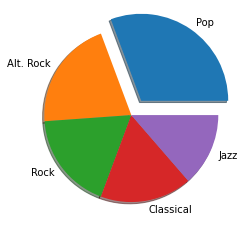

In [30]:
# pie chart to display the most popular genre artist fall into

y = np.array([27, 18, 16, 15, 12])
mylabels = ["Pop", "Alt. Rock", "Rock", "Classical", "Jazz"]
myexplode = [0.2, 0, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show()

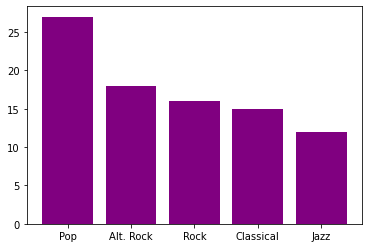

In [53]:
# bar graph to display the same as above
x = ["Pop", "Alt. Rock", "Rock", "Classical", "Jazz"]
y = [27, 18, 16, 15, 12]

plt.bar(x, y, color = "purple")
plt.show()

# Gender

In [31]:
#GENDER COUNT - NULL INCLUDED

#count of unique genres, excluding null values
gender_counts = audio_df['gender'].value_counts()

#series
gender_counts

Null      272
Male      228
Female     46
Mixed      40
Name: gender, dtype: int64

In [32]:
#GENDER COUNT - NULL DROPPED

#count of unique genres, excluding null values
gender_counts_dropped = gender_dropped['gender'].value_counts()

#series
gender_counts_dropped

Male      228
Female     46
Mixed      40
Name: gender, dtype: int64

In [33]:
#GENDER PROPORTION - NULL INCLUDED

#proportion each genre represents in the data
gender_proportion = round(gender_counts / gender_counts.sum(), 2)

#series
gender_proportion

Null      0.46
Male      0.39
Female    0.08
Mixed     0.07
Name: gender, dtype: float64

In [34]:
#GENDER PROPORTION - NULL DROPPED

#proportion each genre represents in the data
gender_proportion_dropped = round(gender_counts_dropped / gender_counts_dropped.sum(), 2)

#series
gender_proportion_dropped

Male      0.73
Female    0.15
Mixed     0.13
Name: gender, dtype: float64

In [36]:
statistics.mode(gender_dropped['gender'])

'Male'

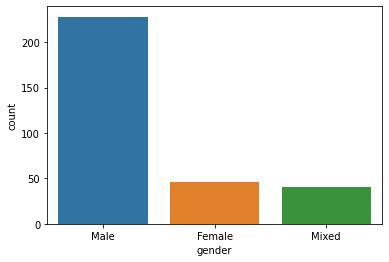

In [37]:
# How many of our artists are male, female, mixed? Create a count plot

sns.countplot(x = gender_dropped['gender'], data = audio_df)
plt.show()

# This plot shows that most of the artists reported in this dataset are male

# Genre by location

In [38]:
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'location' dropped
gender_location_na = location_na.replace({'gender': r'Null'}, {'gender': np.nan}, regex=True)
genre_location_dropped = location_dropped.dropna(axis=0, subset=['gender'], inplace=False)
genre_location_dropped

#groupby location
genre_location_grouped = genre_location_dropped.groupby('location')

#count location by genre
genre_by_location = genre_location_grouped['genre'].value_counts()

genre_by_location

# Maybe pull top 3 locations

location                    genre       
 Lohja/Turku, Finland       Doom Metal      1
A Coruña, Spain             Folk            1
Akersloot                   Hardcore        1
Andorra la Vella            Death Metal     1
Anstey, Leicestershire, GB  Pop             1
                                           ..
USA                         Thrash Metal    1
Vierse                      New Age         1
Würzburg, Bavaria           Thrash Metal    1
Zagreb, Croatia             Punk Rock       1
Zaragoza, España            Null            1
Name: genre, Length: 188, dtype: int64

In [41]:
#Genre by Location
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'location' dropped
genre_location_na = location_na.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_location_dropped = genre_location_na.dropna(axis=0, subset=['genre'], inplace=False)
genre_location_na.dropna(axis=0, subset=['location'], inplace=False)
genre_location_dropped

#groupby location
genre_location_grouped = genre_location_dropped.groupby('location')

#count location by genre
genre_by_location = genre_location_grouped['genre'].value_counts()

#sort values in descending order
genre_by_location_sorted = genre_by_location.sort_values(ascending=False)

#isolate top 3 locations
genre_by_location_top3 = genre_by_location_sorted.loc[['USA', 'UK', 'Germany']]

genre_by_location_top3

#create dictionary and convert to df
genre_by_location_top3_dict = {'Genre by Location':genre_by_location_top3}
genre_by_location_top3_df = pd.DataFrame(genre_by_location_top3_dict)
genre_by_location_top3_df

Genre by Location
location genre                          
USA      Jazz                         10
         Hip-Hop                       5
         Indie                         4
         Rock                          4
         Pop                           3
...                                  ...
Germany  Classical                     1
         Gothic Metal                  1
         Heavy Metal                   1
         Pop                           1
         Techno                        1

[72 rows x 1 columns]

In [54]:
genre_by_location.describe()

count    217.000000
mean       1.336406
std        0.958496
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        8.000000
Name: genre, dtype: float64

In [3]:
# audio_df['genre'].corr(audio_df['location'])

NameError: name 'audio_df' is not defined

Notes for questions and stats to run:

This data is categorical and nominal (unordered)
Best to use counts and bar graphs for categorical data
Measure of center: Mode - used to categorical data b/c the variables don't have a numerical representation and use the function in stats module: statistics.mode

Questions:

Which genre has the most artists? 
Is there a relationship between genre artists choose and location?

# year by genre. Genre first then year

In [44]:
#Find the max year
max_year_formed = year_formed_dropped['year_formed'].max()
max_year_formed

'2016'

In [45]:
min_year_formed = year_formed_dropped['year_formed'].min()
min_year_formed

'1602'

In [50]:
# Find year bands formed each year

year_count = year_formed_dropped.groupby('year_formed').size()

#create dictionary and convert to df
year_count_dict = {'Year Count':year_count}
year_count_df = pd.DataFrame(year_count_dict)
year_count_df

,Year Count
year_formed,
1602,1
1839,1
1893,2
1896,1
1913,1
...,...
2012,4
2013,1
2014,3


In [51]:
#Genre by Year
#GROUPBYS WITH NULL VALUES DROPPED

#create new vartiables = one df with null values in 'genre' and 'year_formed' dropped
genre_year_na = genre_na.replace({'year_formed': r'Null'}, {'year_formed': np.nan}, regex=True)
genre_year_dropped = genre_year_na.dropna(axis=0, subset=['year_formed'], inplace=False)
genre_year_dropped

#groupby year formed
year_genre_grouped = genre_year_dropped.groupby('genre')

#count genre on year formed groupby
year_by_genre = year_genre_grouped['year_formed'].value_counts()

year_by_genre_top3 = year_by_genre.loc[['Pop', 'Jazz', 'Rock']]

#create dictionary and convert to df
year_by_genre_top3_dict = {'Genre by Year':year_by_genre_top3}
year_by_genre_top3_df = pd.DataFrame(year_by_genre_top3_dict)
genre_by_location_top3_df



#create new vartiables = one df with null values in 'genre' and 'location' dropped
genre_location_na = location_na.replace({'genre': r'Null'}, {'genre': np.nan}, regex=True)
genre_location_dropped = genre_location_na.dropna(axis=0, subset=['genre'], inplace=False)
genre_location_na.dropna(axis=0, subset=['location'], inplace=False)
genre_location_dropped

#groupby location
genre_location_grouped = genre_location_dropped.groupby('location')

#count location by genre
genre_by_location = genre_location_grouped['genre'].value_counts()

#sort values in descending order
genre_by_location_sorted = genre_by_location.sort_values(ascending=False)

#isolate top 3 locations
genre_by_location_top3 = genre_by_location_sorted.loc[['USA', 'UK', 'Germany']]

genre_by_location_top3

#create dictionary and convert to df
genre_by_location_top3_dict = {'Genre by Location':genre_by_location_top3}
genre_by_location_top3_df = pd.DataFrame(genre_by_location_top3_dict)
genre_by_location_top3_df

Genre by Location
location genre                          
USA      Jazz                         10
         Hip-Hop                       5
         Indie                         4
         Rock                          4
         Pop                           3
...                                  ...
Germany  Classical                     1
         Gothic Metal                  1
         Heavy Metal                   1
         Pop                           1
         Techno                        1

[72 rows x 1 columns]